In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\Home\Desktop\Projects\loan.csv')

# About the data

In [3]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

# Hypothesis Generation

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

Salary: Applicants with high income should have more chances of loan approval.

Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loan for less time period and less amount should have higher chances of approval.

EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable, you can come up with many more factors

# Import the required Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

### Displaying Top 5 Rows of The Dataset

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(614, 13)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data preprocessing

### Check for Null Values In The Dataset

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Handling The missing Values

In [11]:
data = data.drop('Loan_ID',axis=1)

In [12]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


since the missing values of Gender,Dependents,LoanAmount and Loan_Amount_Term is less than 5% we can drop those records

In [13]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [14]:
data = data.dropna(subset=columns)

In [15]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

For Self_Employed and Credit_History we can treat the missing values using mode

In [16]:
data['Self_Employed'].mode()[0]

'No'

In [17]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [18]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data['Credit_History'].mode()[0]

1.0

In [22]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [23]:
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### Handling Categorical Columns with Label Encoding

In [24]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
503,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,1.0,Rural,N
270,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
27,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
413,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y
378,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,N


In [25]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [26]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [27]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [29]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### Storing Feature Matrix In X And Response (Target) In Vector y

In [30]:
X = data.drop('Loan_Status',axis=1)

In [31]:
y = data['Loan_Status']

In [32]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

### Feature Scaling

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [34]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [35]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [36]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# Model Building :

We will build the following models for our pre processed Dataset.

i)Logistic Regression

ii)SVC

iii)Random Forest


### Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [38]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

In [39]:
model_df

{}

###  Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


### SVC

In [41]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


###  Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfmodel =RandomForestClassifier()
model_val(rfmodel,X,y)

RandomForestClassifier() accuracy is 0.7657657657657657
RandomForestClassifier() Avg cross val score is 0.7867158067158068


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [0.25,0.50,0.75,1],
            'svc__kernel': ['linear']
            
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': np.arange(10,1000,10),
            
            'randomforestclassifier__max_features':['auto','sqrt'],
            'randomforestclassifier__max_depth':[None,3,5,10,20,30],
            'randomforestclassifier__min_samples_split':[2,5,20,50,100],
            'randomforestclassifier__min_samples_leaf':[1,2,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C':np.logspace(-4,4,20),
             'logisticregression__solver':['liblinear']
            
        }
    }
}

In [45]:
scores = []
best_estimator = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = RandomizedSearchCV(pipe, mp['params'], cv=5, n_iter=20,verbose=True)
    clf.fit(X,y)
    scores.append({
        'model': algo,
        'best_scores': clf.best_score_,
        'best_params': clf.best_params_
            })
    best_estimator[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
scores

[{'model': 'svm',
  'best_scores': 0.8066011466011467,
  'best_params': {'svc__kernel': 'linear', 'svc__C': 0.25}},
 {'model': 'random_forest',
  'best_scores': 0.8084193284193285,
  'best_params': {'randomforestclassifier__n_estimators': 240,
   'randomforestclassifier__min_samples_split': 20,
   'randomforestclassifier__min_samples_leaf': 1,
   'randomforestclassifier__max_features': 'sqrt',
   'randomforestclassifier__max_depth': 3}},
 {'model': 'logistic_regression',
  'best_scores': 0.8047829647829647,
  'best_params': {'logisticregression__solver': 'liblinear',
   'logisticregression__C': 0.0018329807108324356}}]

###  Save The Model

In [47]:
BEST_CLF=best_estimator['random_forest']
BEST_CLF

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=50,
                                        n_estimators=910))])

In [48]:
BEST_CLF.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=50,
                                        n_estimators=910))])

In [51]:
import joblib

In [50]:
joblib.dump(BEST_CLF,'loan_status_predict')

['loan_status_predict']

# Finding the important feature


Let us find the feature importance now, i.e. which features are most important for this problem.

<AxesSubplot:>

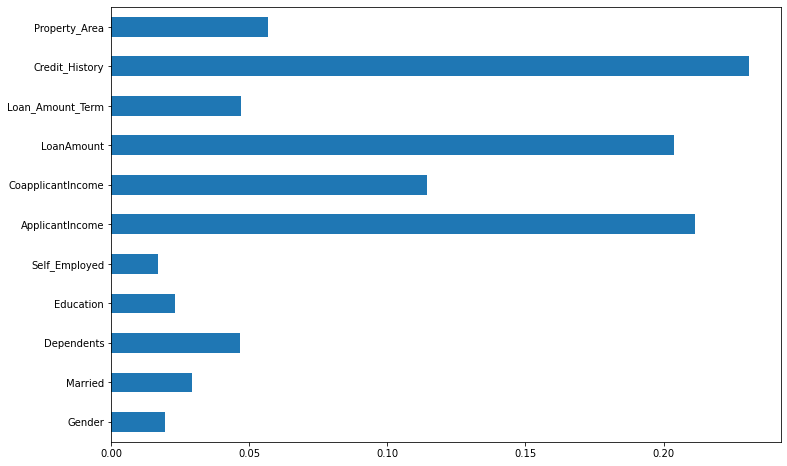

In [48]:
importances = pd.Series(rfmodel.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can find out that 'Credit_History','Applicant Income','LoanAmount' feature are most important. So, feature engineering helped us in predicting our target variable.

# Model Testing

In [52]:
model = joblib.load('loan_status_predict')

In [53]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [54]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [55]:
result = model.predict(df)

In [56]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# GUI

In [56]:
from tkinter import *
import joblib
import pandas as pd

In [57]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education[Graduate:1,Not Graduate':0]").grid(row=4)
Label(master,text = "Self_Employed[Yes:1,No:0]").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount in thousand dollars").grid(row=8)
Label(master,text = "Loan_Amount_Term in months").grid(row=9)
Label(master,text = "Credit_History[1:Yes,0:No]").grid(row=10)
Label(master,text = "Property_Area[Rural:0,Semiurban:2,Urban:1]").grid(row=11)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()